# Bước 0:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/huongd17at089/income_prediction/master/data_adult.csv"


In [14]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,1,1,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,2,2,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,3,3,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,4,4,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,5,5,34,Private,10th,6,Never-married,White,Male,30,<=50K


In [5]:
df.tail()

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
46028,46029,46029,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46029,46030,46030,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K
46030,46031,46031,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K
46031,46032,46032,22,Private,HS-grad,9,Never-married,White,Male,20,<=50K
46032,46033,46033,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,White,Female,40,>50K


In [6]:
# Unnamed: 0	,X  -> không có ý nghĩa -> drop
df = df.drop(["X", "Unnamed: 0"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.2+ MB


In [7]:
# kiểm tra missing value và duplicate record
print("duplicate : ",any(df.duplicated().tolist()))
df.isnull().sum()

duplicate :  True


age                0
workclass          0
education          0
educational.num    0
marital.status     0
race               0
gender             0
hours.per.week     0
income             0
dtype: int64

In [8]:
df.iloc[df.duplicated().tolist()]

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
88,20,Private,HS-grad,9,Never-married,White,Male,40,<=50K
118,28,Private,HS-grad,9,Never-married,White,Male,40,<=50K
170,34,Private,Masters,14,Never-married,White,Male,40,<=50K
212,41,Private,Some-college,10,Married-civ-spouse,White,Male,40,<=50K
247,26,Private,Bachelors,13,Never-married,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
46022,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,White,Male,50,<=50K
46026,53,Private,Masters,14,Married-civ-spouse,White,Male,40,>50K
46027,22,Private,Some-college,10,Never-married,White,Male,40,<=50K
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,34,Private,10th,6,Never-married,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...,...
46024,43,Private,Assoc-voc,11,Married-civ-spouse,White,Male,45,<=50K
46025,32,Private,Masters,14,Never-married,Asian-Pac-Islander,Male,11,<=50K
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46030,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K


In [ ]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [15]:
df.income = df.income.apply(lambda x: x == ">50K").astype("int64")

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,1,1,25,Private,11th,7,Never-married,Black,Male,40,0
1,2,2,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,0
2,3,3,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,1
3,4,4,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,1
4,5,5,34,Private,10th,6,Never-married,White,Male,30,0
...,...,...,...,...,...,...,...,...,...,...,...
46028,46029,46029,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,0
46029,46030,46030,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,1
46030,46031,46031,58,Private,HS-grad,9,Widowed,White,Female,40,0
46031,46032,46032,22,Private,HS-grad,9,Never-married,White,Male,20,0


In [17]:
continuous_vars = ["age", "educational.num", "hours.per.week"]
categorical_vars = ["workclass", "education", "marital.status", "race", "gender"]
target = "income"

# Bước 1

In [19]:
df1 = df[continuous_vars]
df1.sample(5)

,age,educational.num,hours.per.week
7755,46,12,50
3601,33,10,40
31646,25,7,40
32275,43,13,50
1208,47,10,55


In [ ]:
df1.describe()

,age,educational.num,hours.per.week
count,26924.000000,26924.000000,26924.000000
mean,41.062546,10.198262,41.518905
std,13.626968,2.874213,14.034889
min,17.000000,1.000000,1.000000
25%,31.000000,9.000000,36.000000
50%,40.000000,10.000000,40.000000
75%,50.000000,13.000000,50.000000
max,90.000000,16.000000,99.000000


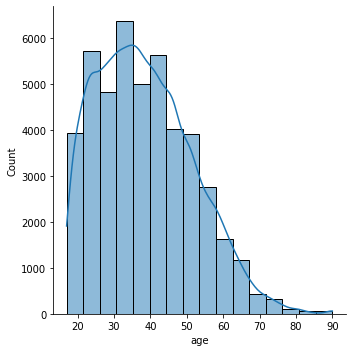

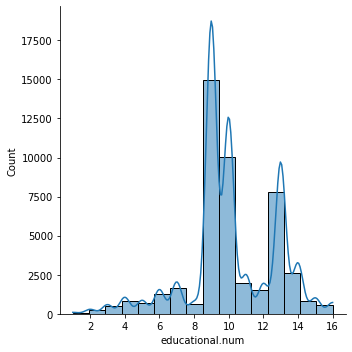

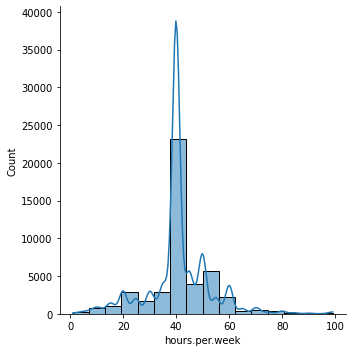

In [21]:

# fig, axes = plt.subplots(1,ncols=n_col, figsize = (10, 10))
for ind,var in enumerate(continuous_vars):
  sns.displot(df1[var],kde = True, bins = 16)

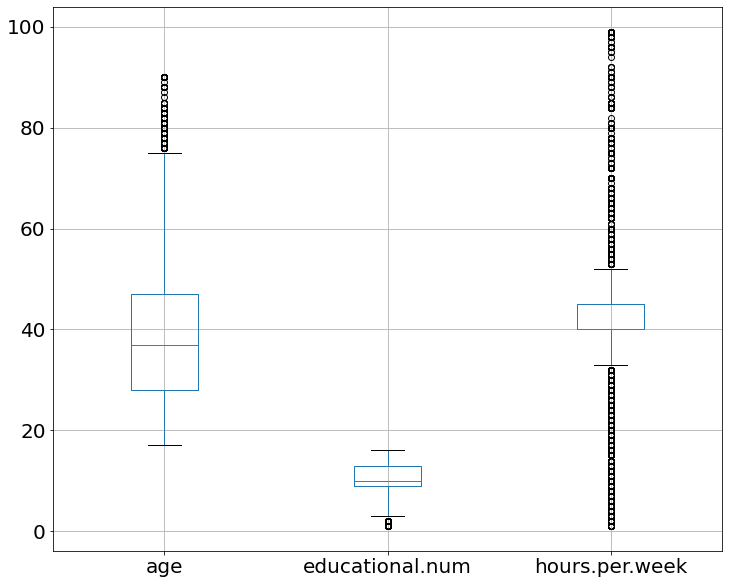

In [ ]:
boxplot = df.boxplot(column=continuous_vars, figsize=(12, 10), fontsize=20)

In [ ]:
df1.corr()

,age,educational.num,hours.per.week,income
age,1.000000,0.037566,0.102185,0.237338
educational.num,0.037566,1.000000,0.145151,0.332293
hours.per.week,0.102185,0.145151,1.000000,0.226795
income,0.237338,0.332293,0.226795,1.000000


#Bước 2

In [ ]:
df2 = df[categorical_vars]
df2.sample(5)

,workclass,education,marital.status,race,gender
9340,Private,Assoc-voc,Never-married,White,Male
15275,Private,HS-grad,Never-married,White,Female
22498,Private,HS-grad,Married-civ-spouse,White,Male
30856,Local-gov,HS-grad,Married-civ-spouse,Black,Male
36626,Private,HS-grad,Never-married,White,Male


<Figure size 432x288 with 0 Axes>

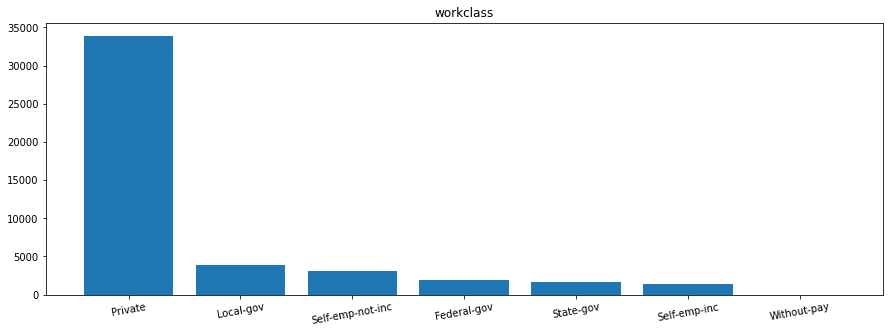

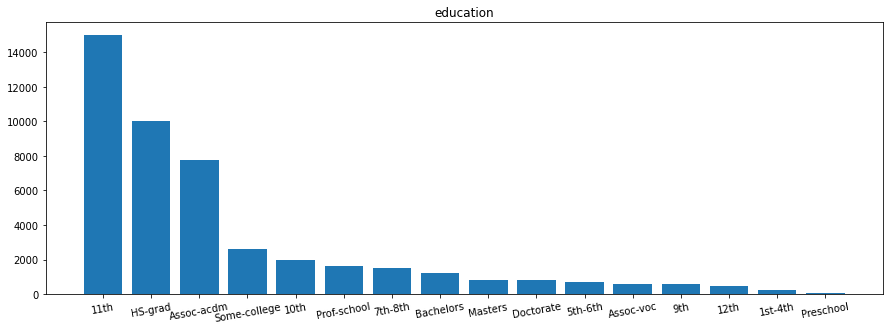

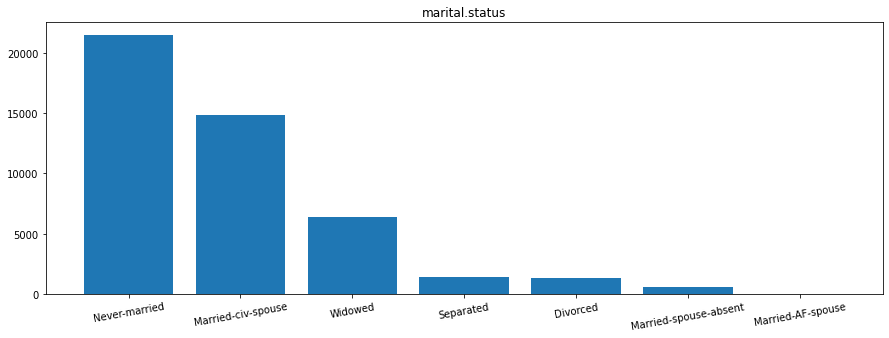

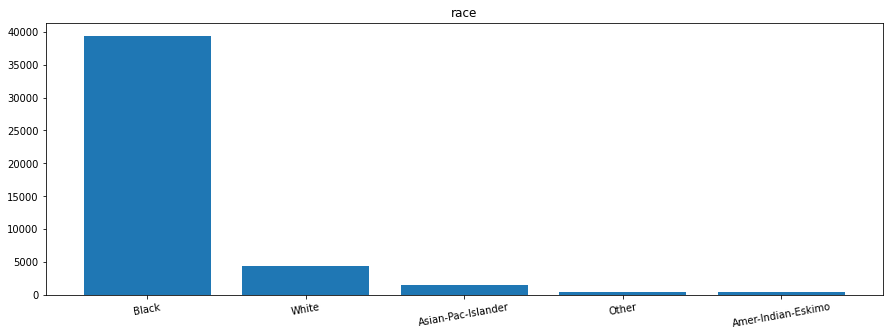

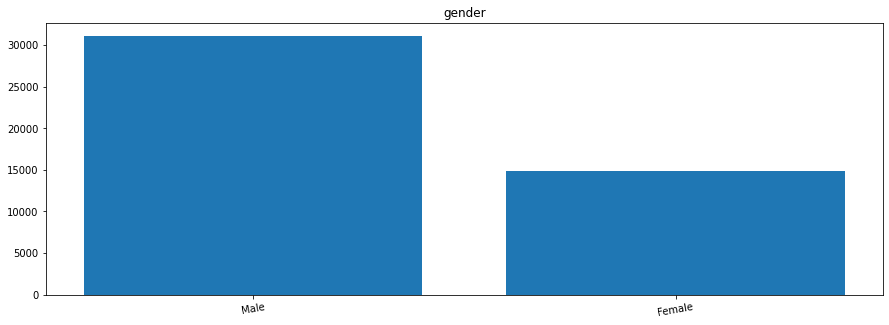

In [ ]:
from matplotlib import pyplot as plt
# fig,axes = plt.subplots(nrows=len(categorical_vars),figsize=(20,20))

for ind,var in enumerate(categorical_vars):
  Frequency = df2[var].value_counts().values
  Percentage = Frequency/len(Frequency)*100
  plt.figure(ind)
  plt.figure(figsize=(15,5));
  plt.bar( df2[var].unique(), Frequency)
  plt.title(var)
  plt.xticks(rotation = 10)
#   axes[ind,0].set_title(var)
#   axes[ind,1].pie(x=Percentage, radius=1.5)
# plt.legend();

# Bước 3

In [23]:
df = pd.read_csv(url)
df = df.drop(["X", "Unnamed: 0"], axis=1)
df.columns = ["age"	,"workclass"	,"education"	,"educational_num",	"marital_status",	"race",	"gender",	"hours_per_week",	"income"]
df = df.drop_duplicates().reindex()
df

,age,workclass,education,educational_num,marital_status,race,gender,hours_per_week,income
0,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,34,Private,10th,6,Never-married,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...,...
46024,43,Private,Assoc-voc,11,Married-civ-spouse,White,Male,45,<=50K
46025,32,Private,Masters,14,Never-married,Asian-Pac-Islander,Male,11,<=50K
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46030,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K


[**Feature dictionary**](https://www.rdocumentation.org/packages/arules/versions/1.6-8/topics/Adult?fbclid=IwAR0HfnizTamXTX72dbU-r26KFFNFla2CJJPEHT_PEVgvn0r2d1yuwLasxFU)

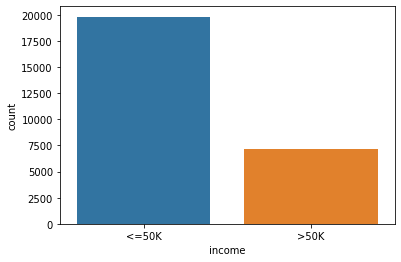

In [24]:
sns.countplot(x = "income", data = df);

In [25]:
df.loc[(df.age >= 80) & (df.hours_per_week >= 60)]

,age,workclass,education,educational_num,marital_status,race,gender,hours_per_week,income
3284,90,Self-emp-not-inc,Prof-school,15,Widowed,White,Male,60,<=50K
7912,90,Federal-gov,Masters,14,Divorced,White,Male,99,<=50K
18850,80,Private,Some-college,10,Never-married,White,Male,60,<=50K
20332,90,Local-gov,Masters,14,Married-civ-spouse,White,Male,60,>50K
22578,84,Private,Masters,14,Never-married,White,Male,66,<=50K
23598,90,Private,Prof-school,15,Married-civ-spouse,White,Male,72,>50K
27404,81,Private,Masters,14,Widowed,White,Male,60,<=50K
29803,90,Private,HS-grad,9,Widowed,White,Male,99,<=50K


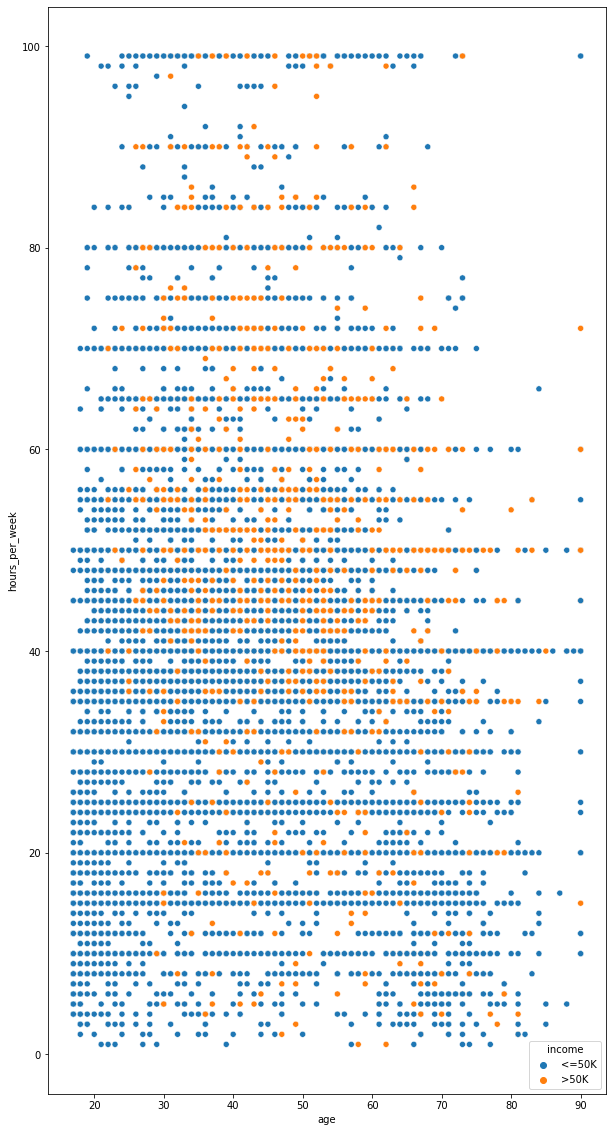

In [26]:
plt.figure(figsize=(10,20))
sns.scatterplot(data = df, x = "age", y = "hours_per_week", hue = "income");

In [55]:
data = df.copy()

In [56]:
data.age = pd.cut(data.age, bins = [0, 20,30, 65,100], labels = [0,1,2,3])
data.hours_per_week = pd.cut(data.hours_per_week, bins = [0,25,40,60, 100], labels = [0,1,2,3])

In [57]:
from sklearn.preprocessing import LabelEncoder

data.income = LabelEncoder().fit(["<=50K", ">50K"]).transform(data.income)
data.gender = LabelEncoder().fit_transform(data.gender)
data.education = LabelEncoder().fit(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th",
                                      "10th", "11th", "12th", "HS-grad", "Prof-school",
                                     "Assoc-acdm", "Assoc-voc", "Some-college", "Bachelors",
                                     "Masters", "Doctorate"]).transform(data.education)
data.marital_status = LabelEncoder().fit_transform(data.marital_status)
data.race = LabelEncoder().fit_transform(data.race)
data.workclass = LabelEncoder().fit_transform(data.workclass)

In [ ]:
# data = pd.get_dummies(data, prefix= ["marital_status", "race", "workclass", "education"],  columns = ["marital_status", "race", "workclass", "education"], drop_first=True)

In [46]:
data

,age,workclass,education,educational_num,marital_status,race,gender,hours_per_week,income
0,1,2,1,7,4,2,1,1,0
1,2,2,11,9,2,4,1,2,0
2,1,1,7,12,2,4,1,1,1
3,2,2,15,10,2,2,1,1,1
4,2,2,0,6,4,4,1,1,0
...,...,...,...,...,...,...,...,...,...
46024,2,2,8,11,2,4,1,2,0
46025,2,2,12,14,4,1,1,0,0
46028,1,2,7,12,2,4,0,1,0
46030,2,2,11,9,6,4,0,1,0


In [58]:
data.astype("int64")

,age,workclass,education,educational_num,marital_status,race,gender,hours_per_week,income
0,1,2,1,7,4,2,1,1,0
1,2,2,11,9,2,4,1,2,0
2,1,1,7,12,2,4,1,1,1
3,2,2,15,10,2,2,1,1,1
4,2,2,0,6,4,4,1,1,0
...,...,...,...,...,...,...,...,...,...
46024,2,2,8,11,2,4,1,2,0
46025,2,2,12,14,4,1,1,0,0
46028,1,2,7,12,2,4,0,1,0
46030,2,2,11,9,6,4,0,1,0


In [59]:
Y = data.income
X = data.drop(labels= "income", axis=1)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

x_train, x_test, y_train , y_test = train_test_split(X, Y, test_size = 0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3951
           1       0.62      0.53      0.57      1434

    accuracy                           0.79      5385
   macro avg       0.73      0.71      0.72      5385
weighted avg       0.78      0.79      0.78      5385



In [ ]:
feature_importances = model.feature_importances_
# feature_importances.sort()

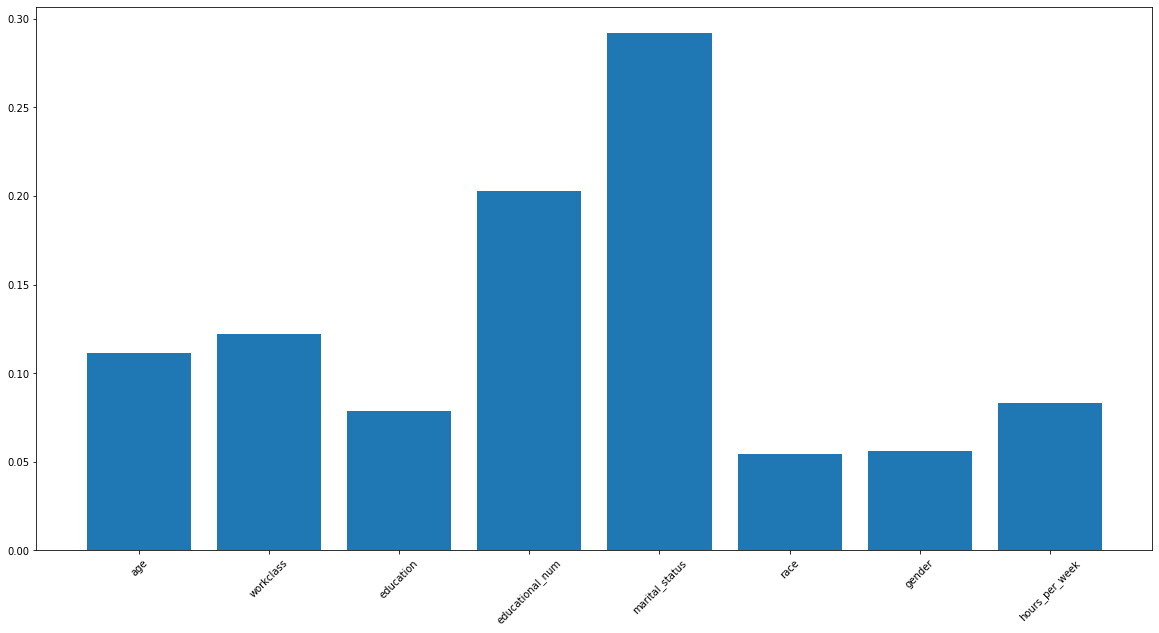

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(height= feature_importances.tolist(), x = X.columns)
plt.xticks(rotation = 45);

In [ ]:
data_test = x_test
data_test = data_test.assign(true_label = y_test.values, predict_label = y_predict)
data_test.loc[(data_test.true_label != data_test.predict_label)]["true_label"]

15065    0
20246    1
13165    1
31678    1
33507    0
        ..
165      1
12659    1
6299     0
478      1
17623    1
Name: true_label, Length: 1127, dtype: int64

# Bước 4

**Nháp**

In [ ]:
data = df.copy()
data["income"].unique()


array(['<=50K', '>50K'], dtype=object)

In [ ]:
data.loc[ data.income == ">50K", "income"] = 0
data.loc[ data.income == "<=50K", "income"] = 1
data

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,1
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,0
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,0
4,34,Private,10th,6,Never-married,White,Male,30,1
...,...,...,...,...,...,...,...,...,...
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,1
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,0
46030,58,Private,HS-grad,9,Widowed,White,Female,40,1
46031,22,Private,HS-grad,9,Never-married,White,Male,20,1


In [ ]:
data.income = data.income.astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


In [ ]:
print(data.corr())

                      age  educational.num  hours.per.week    income
age              1.000000         0.037566        0.102185 -0.237338
educational.num  0.037566         1.000000        0.145151 -0.332293
hours.per.week   0.102185         0.145151        1.000000 -0.226795
income          -0.237338        -0.332293       -0.226795  1.000000


In [ ]:
from scipy import stats
import numpy as np

a = data.age.values
b = data.income.values

print(np.corrcoef(a, b))

[[1.         0.23733761]
 [0.23733761 1.        ]]
